## Technical Lesson: Deep Learning with Normalization & Regularization


### Step 0: Set Up Your Environment


If needed.

In [ ]:
# ! pip install --upgrade tensorflow scikit-learn numpy matplotlib

### Step 1: Import Libraries and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
cal_data = fetch_california_housing()
X = cal_data.data
y = cal_data.target

print("Data shape:", X.shape)        # Should be (20640, 8)
print("Target shape:", y.shape)      # Should be (20640,)


Data shape: (20640, 8)
Target shape: (20640,)


### Step 2: Create a Validation Split

In [2]:
# Split into train and test first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Further split train data into train and validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Training data shape:", X_train_final.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)


Training data shape: (13209, 8)
Validation data shape: (3303, 8)
Test data shape: (4128, 8)


### Step 3: Normalize the Data

In [3]:
scaler = StandardScaler()
scaler.fit(X_train_final)

X_train_scaled = scaler.transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Feature means:", scaler.mean_)
print("Feature variances:", scaler.var_)


Feature means: [ 3.86893364e+00  2.85672647e+01  5.42040408e+00  1.09433536e+00
  1.42691650e+03  3.02944025e+00  3.56468476e+01 -1.19583303e+02]
Feature variances: [3.57143560e+00 1.58482738e+02 4.48993988e+00 1.45205080e-01
 1.29315681e+06 4.70353691e+01 4.55294423e+00 4.02078197e+00]


### Step 4: Build a Baseline Model (No Regularization)

In [4]:
baseline_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

baseline_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_baseline = baseline_model.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
413/413 [==============================] - 1s 1ms/step - loss: 0.9189 - mae: 0.6180 - mse: 0.9189 - val_loss: 0.4465 - val_mae: 0.4677 - val_mse: 0.4465
Epoch 2/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3823 - mae: 0.4377 - mse: 0.3823 - val_loss: 0.5445 - val_mae: 0.4527 - val_mse: 0.5445
Epoch 3/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3564 - mae: 0.4215 - mse: 0.3564 - val_loss: 0.4428 - val_mae: 0.4362 - val_mse: 0.4428
Epoch 4/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3824 - mae: 0.4161 - mse: 0.3824 - val_loss: 0.5850 - val_mae: 0.4331 - val_mse: 0.5850
Epoch 5/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3350 - mae: 0.4042 - mse: 0.3350 - val_loss: 0.3613 - val_mae: 0.4166 - val_mse: 0.3613
Epoch 6/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3247 - mae: 0.3977 - mse: 0.3247 - val_loss: 0.3878 - val_mae: 0.4165 - val_mse: 0.3878
Epoch 7/10

### Step 5: Add Batch Normalization

In [5]:
model_bn = keras.Sequential([
    layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(64, activation='linear'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1)
])

model_bn.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_bn = model_bn.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6556 - mae: 0.5779 - mse: 0.6556 - val_loss: 0.5447 - val_mae: 0.4942 - val_mse: 0.5447
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4332 - mae: 0.4757 - mse: 0.4332 - val_loss: 1.9583 - val_mae: 0.4977 - val_mse: 1.9583
Epoch 3/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4107 - mae: 0.4634 - mse: 0.4107 - val_loss: 0.7040 - val_mae: 0.5589 - val_mse: 0.7040
Epoch 4/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3955 - mae: 0.4504 - mse: 0.3955 - val_loss: 0.8522 - val_mae: 0.5087 - val_mse: 0.8522
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3874 - mae: 0.4486 - mse: 0.3874 - val_loss: 1.1323 - val_mae: 0.4738 - val_mse: 1.1323
Epoch 6/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3748 - mae: 0.4369 - mse: 0.3748 - val_loss: 1.1866 - val_mae: 0.4564 - val_mse: 1.1866
Epoch 7/10

### Step 6: Incorporate Regularization (L2 + Dropout)

In [6]:
l2_reg = 1e-4
dropout_rate = 0.3

model_reg = keras.Sequential([
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg),
                 input_shape=(X_train.shape[1],)),
    layers.Dropout(dropout_rate),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dropout(dropout_rate),

    layers.Dense(1)
])

model_reg.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_reg = model_reg.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 1.1639 - mae: 0.7551 - mse: 1.1558 - val_loss: 0.5032 - val_mae: 0.4903 - val_mse: 0.4950
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 0.6471 - mae: 0.5594 - mse: 0.6390 - val_loss: 0.4477 - val_mae: 0.4594 - val_mse: 0.4396
Epoch 3/100
413/413 [==============================] - 1s 1ms/step - loss: 0.5416 - mae: 0.5227 - mse: 0.5335 - val_loss: 0.4822 - val_mae: 0.4624 - val_mse: 0.4740
Epoch 4/100
413/413 [==============================] - 0s 1ms/step - loss: 0.5128 - mae: 0.5041 - mse: 0.5047 - val_loss: 0.4691 - val_mae: 0.4587 - val_mse: 0.4609
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4951 - mae: 0.4955 - mse: 0.4869 - val_loss: 0.4444 - val_mae: 0.4443 - val_mse: 0.4362
Epoch 6/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4642 - mae: 0.4818 - mse: 0.4559 - val_loss: 0.4043 - val_mae: 0.4386 - val_mse: 0.3961
Epoch 7/10

### Step 7: Evaluate and Compare Models

In [7]:
print("=== Baseline Model ===")
train_scores = baseline_model.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores   = baseline_model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores[1]:.4f}, Train MSE: {train_scores[2]:.4f}")
print(f"Val   MAE: {val_scores[1]:.4f}, Val   MSE: {val_scores[2]:.4f}")

print("\n=== BatchNorm Model ===")
train_scores_bn = model_bn.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_bn   = model_bn.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_bn[1]:.4f}, Train MSE: {train_scores_bn[2]:.4f}")
print(f"Val   MAE: {val_scores_bn[1]:.4f}, Val   MSE: {val_scores_bn[2]:.4f}")

print("\n=== Regularized Model (L2 + Dropout) ===")
train_scores_reg = model_reg.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_reg   = model_reg.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_reg[1]:.4f}, Train MSE: {train_scores_reg[2]:.4f}")
print(f"Val   MAE: {val_scores_reg[1]:.4f}, Val   MSE: {val_scores_reg[2]:.4f}")


=== Baseline Model ===
Train MAE: 0.3103, Train MSE: 0.2019
Val   MAE: 0.3561, Val   MSE: 0.2707

=== BatchNorm Model ===
Train MAE: 0.3990, Train MSE: 0.3787
Val   MAE: 0.4157, Val   MSE: 0.4102

=== Regularized Model (L2 + Dropout) ===
Train MAE: 0.3536, Train MSE: 0.2620
Val   MAE: 0.3768, Val   MSE: 0.2937


### Step 8: Test Set for Final Performance

In [8]:
test_scores_reg = model_reg.evaluate(X_test_scaled, y_test, verbose=0)
print("\n[Regularized Model on Test Set]")
print(f"Test MAE: {test_scores_reg[1]:.4f}, Test MSE: {test_scores_reg[2]:.4f}")



[Regularized Model on Test Set]
Test MAE: 0.3691, Test MSE: 0.2860


### Step 9: Visualize Training Curves

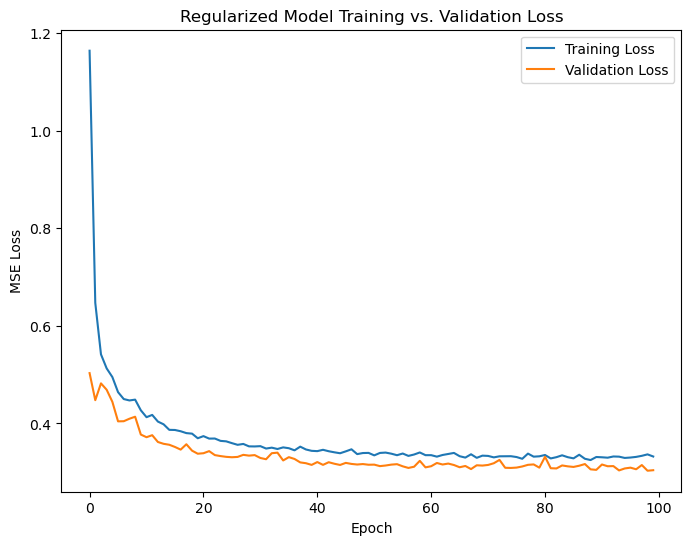

In [9]:
plt.figure(figsize=(8,6))
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Regularized Model Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()
